# An introduction to Numpy

Some useful references:

- The [numpy tutorial at scipy.org](http://wiki.scipy.org/Tentative_NumPy_Tutorial) is a handy read for the key ideas around using Numpy.

- The [Numpy/Scipy documentation](http://docs.scipy.org/doc).

- A set of [Lectures on scientific computing with Python](https://github.com/jrjohansson/scientific-python-lectures#online-read-only-versions), written as a collection of Notebooks.

- The [Python Scientific Lecture Notes](http://scipy-lectures.github.io) also contain lots of useful materials on today's topics.

- If you come from an IDL background, this [IDL-to-Numpy guide](https://www.cfa.harvard.edu/~jbattat/computer/python/science/idl-numpy.html) will be useful.

- Similarly, [for Matlab users](http://www.scipy.org/NumPy_for_Matlab_Users).


<!-- CSS styles for this notebook -->
<style type="text/css">
    .exercise {
        border: solid 3px #79A5D4;
        background: #E0EAF1;
        padding: 50px 10px 50px 10px;
        display: inline-block;
        font-size: 110%;
    }
</style>
(c) J. Bloom UC Berkeley, 2016

## The `ndarray` object

The basic building block of the numpy package is the ndarray: a multidimensional, homogeneous array of fixed-size items.

An associated data-type object describes the format of
each element in the array (its byte-order, how many bytes it occupies in
memory, whether it is an integer, a floating point number, or something
else, etc.)

<center>
<img src=http://docs.scipy.org/doc/numpy/_images/threefundamental.png></img>
</center>

New instances of the ndarray class are never (rarely) created directly, but instead through a method that returns one.

In [1]:
from __future__ import absolute_import, division, print_function
import numpy as np

In [2]:
a = np.array([1, 2, 3])
a

array([1, 2, 3])

In [3]:
b = np.ones((3,2))
b

array([[ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.]])

In [4]:
c = np.empty((2,3,2))
c

array([[[  1.19278106e-312,   2.49962988e-316],
        [  0.00000000e+000,   0.00000000e+000],
        [  0.00000000e+000,   0.00000000e+000]],

       [[  0.00000000e+000,   0.00000000e+000],
        [  0.00000000e+000,   0.00000000e+000],
        [  0.00000000e+000,   0.00000000e+000]]])

In [5]:
d = np.zeros((3,2))
d

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

Is it worth using `np.empty` for performance reasons? Use `%timeit` to figure it out!

In [6]:
for s in [1e3, 1e5, 1e7]:
    size = int(s)
    print('Timing array creation with:', size, 'elements')
    print("Zeros:")
    %timeit np.zeros(size)
    print("Empty:")
    %timeit np.empty(size)
    print("*"*20)

Timing array creation with: 1000 elements
Zeros:
The slowest run took 12.16 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.02 µs per loop
Empty:
The slowest run took 4.01 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.56 µs per loop
********************
Timing array creation with: 100000 elements
Zeros:
The slowest run took 4.26 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 42.5 µs per loop
Empty:
The slowest run took 4.53 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.52 µs per loop
********************
Timing array creation with: 10000000 elements
Zeros:
The slowest run took 8.08 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 8.35 µ

I very frequently use linspace and logspace to create regularly sampled 1 dimensional ndarrays.  The syntax is `linspace(start, end, number_of_points)`:

In [7]:
np.linspace(1,10,5)

array([  1.  ,   3.25,   5.5 ,   7.75,  10.  ])

In [8]:
np.logspace(1,2,5)

array([  10.        ,   17.7827941 ,   31.6227766 ,   56.23413252,  100.        ])

## Reading and writing

Recall from the bootcamp, that:

- `np.save`: write an array to a binary file with `.npy` extension.
- `np.savez`: write several arrays to a binary file with `.npz` extension.
- `np.load`: read one or more arrays from a `.npy` or `.npz` file.
- `np.savetxt`: writes an array to a text file.
- `np.loadtxt`: reads an array from a text file.

Furthermore, the `scipy.io` module has even more reader/writers for ndarrays into other formats.

## Structured Arrays

ndarrays can be composed of (almost) any data type.  The dtype attribute specifies the structure of the stored data. Simple dtypes like `int` and `np.float64` can be used to describe simple numerical types, but numpy can represent elements that have multiple fields each with its own type, naming each one of them.

The syntax is as follows (for more details [see the docs](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html)):

In [11]:
# a list of (name, format) tuples.
dtype_descriptor = [ ('x', np.int32), 
                     ('y', np.float32), 
                     ('name', (np.string_, 10)) ] 
my_arr = np.zeros(2, dtype=dtype_descriptor )

In [12]:
my_arr

array([(0, 0.0, b''), (0, 0.0, b'')], 
      dtype=[('x', '<i4'), ('y', '<f4'), ('name', 'S10')])

In [13]:
my_arr[:] = [(1,2.,'Hello'),(2,3.,"World")]
my_arr

array([(1, 2.0, b'Hello'), (2, 3.0, b'World')], 
      dtype=[('x', '<i4'), ('y', '<f4'), ('name', 'S10')])

In [14]:
my_arr[0][0] = -12

In [15]:
my_arr

array([(-12, 2.0, b'Hello'), (2, 3.0, b'World')], 
      dtype=[('x', '<i4'), ('y', '<f4'), ('name', 'S10')])

In [16]:
len(my_arr)

2

Note that the above dtype descriptor can also be specified with the following syntax instead, which is fully equivalent in functionality:

In [17]:
# A dict with keys 'names' and 'formats', and values respectively tuples with all
# names and all format descriptors. 
# Note that 'S10' is equivalent to (np.string_, 10) to describe a 10-character string
dtype_descriptor = dict(names = ('x', 'y', 'name'),
                        formats = (np.int32, np.float32, 'S10'))

In [18]:
my_arr[1]

(2, 3.0, b'World')

In [19]:
y = my_arr['y']
y

array([ 2.,  3.], dtype=float32)

In [20]:
y[:] = 2*y
y

array([ 4.,  6.], dtype=float32)

In [21]:
my_arr # we get the modified data because we didn't explicitly copy in cell 19

array([(-12, 4.0, b'Hello'), (2, 6.0, b'World')], 
      dtype=[('x', '<i4'), ('y', '<f4'), ('name', 'S10')])

##   Copying and Referencing

The behavior of ndarrays is *different* to that of lists when copying and referencing is involved, and it's very important to understand these differences.

Let's begin by recalling that in Python, two variable names can point to the same object:

In [22]:
lst1 = list(range(10))
print('lst1:', lst1)
lst2 = lst1
lst1 is lst2

lst1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


True

In [23]:
lst2[0] = -9999
lst1

[-9999, 1, 2, 3, 4, 5, 6, 7, 8, 9]

But note that for Python lists, slicing creates a *copy* of the original:

In [24]:
lst3 = lst1[::2]
print('lst1:', lst1)
print('lst3:', lst3)

lst1: [-9999, 1, 2, 3, 4, 5, 6, 7, 8, 9]
lst3: [-9999, 2, 4, 6, 8]


This means that modifying `lst3` will *not* modify `lst1`:

In [25]:
lst3[0] = 100
lst3[1] = 200
print('lst1:', lst1)
print('lst3:', lst3)

lst1: [-9999, 1, 2, 3, 4, 5, 6, 7, 8, 9]
lst3: [100, 200, 4, 6, 8]


Now let's see what happens when we slice arrays:

In [26]:
a1 = np.arange(10)
a2 = a1[::2]
print('a1', a1)
print('a2', a2)

a1 [0 1 2 3 4 5 6 7 8 9]
a2 [0 2 4 6 8]


But when we slice an array, we get a new array which is a *view* over the memory of the original one. This emans that changes to any one of them are seen by the other:

In [27]:
a1[0] = -99
print('a1', a1)
print('a2', a2)

a1 [-99   1   2   3   4   5   6   7   8   9]
a2 [-99   2   4   6   8]


In [28]:
a2[1] = -9999
print('a1', a1)
print('a2', a2)

a1 [  -99     1 -9999     3     4     5     6     7     8     9]
a2 [  -99 -9999     4     6     8]


In [29]:
a2.base is a1

True

In [30]:
print('Data type                :', a1.dtype)
print('Total number of elements :', a1.size)
print('Number of dimensions     :', a1.ndim)
print('Shape (dimensionality)   :', a1.shape)
print('Memory used (in bytes)   :', a1.nbytes)

Data type                : int64
Total number of elements : 10
Number of dimensions     : 1
Shape (dimensionality)   : (10,)
Memory used (in bytes)   : 80


There are also many useful functions in numpy that operate on arrays, e.g.:

In [31]:
print('Minimum and maximum             :', np.min(a1), np.max(a1))
print('Sum and product of all elements :', np.sum(a1), np.prod(a1))
print('Mean and standard deviation     :', np.mean(a1), np.std(a1))

Minimum and maximum             : -9999 9
Sum and product of all elements : -10055 179607637440
Mean and standard deviation     : -1005.5 2997.99567211


For these methods, the above operations area all computed on all the elements of the array.  But for a multidimensional array, it's possible to do the computation along a single dimension, by passing the `axis` parameter; for example:

In [32]:
a1 = a1.reshape((2,5))
print('For the following array:\n', a1)
print('The sum of elements along the rows is    :', np.sum(a1, axis=1))
print('The sum of elements along the columns is :', np.sum(a1, axis=0))

For the following array:
 [[  -99     1 -9999     3     4]
 [    5     6     7     8     9]]
The sum of elements along the rows is    : [-10090     35]
The sum of elements along the columns is : [  -94     7 -9992    11    13]


Misc note: A view of a view seems to create a new copy.

## The array `flags` field

This is a good time to look at the `flags` field of an ndarray, which tells us a lot of information about its internals:

In [33]:
a1.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False

Let's compare that to `a2`:

In [34]:
a2.flags

  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False

Each of these fields is accessible individually, which you can use in your own code:

In [35]:
a2.flags.owndata

False

The `astype` method can be used to create another view of an existing array with a different dtype:

In [36]:
print(a1)
print(a1.shape, a1.dtype)

[[  -99     1 -9999     3     4]
 [    5     6     7     8     9]]
(2, 5) int64


In [37]:
a3 = a1.astype(np.int8)
print(a3.shape, a3.dtype)

(2, 5) int8


In [38]:
print(a3)

[[-99   1 -15   3   4]
 [  5   6   7   8   9]]


If you want to create a separate copy of the data of an array (a "deep" copy in python parlance), use the copy method associated with the ndarray class.

In [39]:
b = a1.copy()

In [40]:
b is a1

False

In [41]:
b.base is a1

False

In [42]:
b[0] = 1234
b

array([[1234, 1234, 1234, 1234, 1234],
       [   5,    6,    7,    8,    9]])

In [43]:
a1

array([[  -99,     1, -9999,     3,     4],
       [    5,     6,     7,     8,     9]])

## Quick recap of array access

ndarrays can be sliced, indexed, and iterated over much like lists.

In [44]:
a = np.arange(10)**3

In [45]:
a

array([  0,   1,   8,  27,  64, 125, 216, 343, 512, 729])

In [46]:
a[2]

8

In [47]:
a[2:5]

array([ 8, 27, 64])

In [48]:
a[:6:2] = -1000
a

array([-1000,     1, -1000,    27, -1000,   125,   216,   343,   512,   729])

In [49]:
a[::-1]

array([  729,   512,   343,   216,   125, -1000,    27, -1000,     1, -1000])

In [50]:
for i in a:
    print(i**(1/3.), end=" ... ")

nan ... 1.0 ... nan ... 3.0 ... nan ... 5.0 ... 6.0 ... 7.0 ... 8.0 ... 9.0 ... 

/home/despo/dlurie/miniconda/envs/py35-env/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in power
  from ipykernel import kernelapp as app


A small note: what is this `nan` business?

In [51]:
b=a**(-1/3.) ; print(b[0])

nan


/home/despo/dlurie/miniconda/envs/py35-env/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in power
  if __name__ == '__main__':


In [52]:
b[0] == np.nan

False

In [53]:
np.isnan(b[0])

True

## Numpy "fancy indexing"

Arrays can be indexed with other arrays instead of using simple integers or slice notation. This is known in the numpy literature as [fancy indexing](http://wiki.scipy.org/Tentative_NumPy_Tutorial#head-0dffc419afa7d77d51062d40d2d84143db8216c2), and the best way to wrap your head around it is to experiment with small examples yourself.

It is important to note that when fancy indexing is used, the resulting output is *always* a copy of the data. Fancy indexing never produces views.

In [54]:
a = np.arange(12)**2                          # the first 12 square numbers
i = np.array( [ 1,1,3,8,5 ] )                 # an array of indices
a[i]                                       # the elements of a at the positions i

array([ 1,  1,  9, 64, 25])

The shape of the index array is what determines the shape of the output! For example, if we index into `a` (which is 1-d) with a 2-d index array, we'll get a 2-d output shaped like the index:

In [55]:
j = np.array( [ [ 3, 4], [ 9, 7 ] ] )
a[j]

array([[ 9, 16],
       [81, 49]])

We can use fancy indexing with multidimensional arrays:

In [56]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

The arrays of indices for each dimension must have the same shape, and *this will be the shape of the output*.

In [57]:
i = np.array( [ [0,1], [1,2] ] )  # our output will be shaped (2,2)
j = np.array( [ [2,1], [3,3] ] )

In [58]:
a[i,j]

array([[ 2,  5],
       [ 7, 11]])

Fancy and 'plain' indexing can be mixed along different dimensions:

In [59]:
a[i,2]

array([[ 2,  6],
       [ 6, 10]])

In [60]:
b = a.ravel()

In [61]:
b.flags.owndata

False

<div class="alert alert-info"> 
<font size=+1>in general, ndarrays methods which return ndarrays, return views.

Functions which operate on ndarrays, return new ndarrays</font>
</div>

## Finding parts of arrays that match conditions

Since conditional expressions return boolean arrays, and we know we can use arrays (as seen above) to index, we can use very simple syntax.

Let's imagine we want to find where the elements of `a` are not zero:

In [62]:
a = np.array([1, 3, 0, -5, 0], float)

In [63]:
a != 0

array([ True,  True, False,  True, False], dtype=bool)

In [64]:
a[a != 0]

array([ 1.,  3., -5.])

The where method provides a convenient (though not always fast) way to search and extract individual elements of an ndarray.  The return value of where is ready to be used for fancy indexing:

In [65]:
nz = np.where(a != 0)
nz

(array([0, 1, 3]),)

In [66]:
a[nz]

array([ 1.,  3., -5.])

In [67]:
x = np.arange(9.).reshape(3, 3)
x

array([[ 0.,  1.,  2.],
       [ 3.,  4.,  5.],
       [ 6.,  7.,  8.]])

In [68]:
x[np.where( x > 5 )]

array([ 6.,  7.,  8.])

For simple conditions selection, the standard boolean index syntax is more readable:

In [70]:
x[(x>5) & (x < 7)]

array([ 6.])

But `where` can also be used to select elements and return instead an array, taking from either argument depending on if the condition is true or false:

In [72]:
np.where(a == 0.0, 1/a, a)  # if a!=0, return 1/0, else return a

/home/despo/dlurie/miniconda/envs/py35-env/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


array([  1.,   3.,  inf,  -5.,  inf])

## Universal Functions

A universal function (or ufunc for short) is a function that operates on ndarrays in an
element-by-element fashion, supporting *array broadcasting*, *type casting*, and several other standard features. That is, a ufunc is a “*vectorized*” wrapper for a function that takes a fixed number of scalar inputs and produces a fixed number of scalar outputs. 

Examples include `add`, `subtract`, `multiply`, `exp`, `log`, `power`, `sin`, `cos` and `tan`.

In [73]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[2, 3], [4, 5]])

In [74]:
a+b

array([[3, 5],
       [7, 9]])

In [75]:
np.multiply(a,b)  # identical to a*b

array([[ 2,  6],
       [12, 20]])

In [76]:
np.power(a,b)  # identical to a**b

array([[   1,    8],
       [  81, 1024]])

ndarray objects have methods for (very) basic statistics.  

Scipy and statsmodels provide high-power statistical functionality, and scikit-learn provides full-fledged machine learning tools.

In [77]:
a = np.array([[1, 2], [3, 4]])

In [78]:
np.mean(a), a.mean()

(2.5, 2.5)

In [79]:
np.mean(a, axis=0), np.mean(a, axis=1)

(array([ 2.,  3.]), array([ 1.5,  3.5]))

In [80]:
np.std(a)

1.1180339887498949

In [81]:
np.average(range(1,11), weights=range(10,0,-1))

4.0

## Vectorizing with `numexpr`

ufuncs are much fast than for loops.  But the numexpr module provides even faster vectorization.

In [82]:
a = np.arange(1e6)
b = np.arange(1e6)

In [83]:
%timeit a**2 + b**2 + 2*a*b

100 loops, best of 3: 15.6 ms per loop


In [84]:
!conda install numexpr -y

Fetching package metadata .......
Solving package specifications: ..........

Package plan for installation in environment /home/despo/dlurie/miniconda/envs/py35-env:

The following packages will be UPDATED:

    numexpr: 2.6.0-np111py35_0 --> 2.6.1-np111py35_0

Unlinking packages ...
[      COMPLETE      ]|###################################################| 100%
Linking packages ...
[      COMPLETE      ]|###################################################| 100%


In [85]:
import numexpr as ne

In [86]:
%timeit ne.evaluate("a**2 + b**2 + 2*a*b")

100 loops, best of 3: 5.91 ms per loop


In [87]:
ne.set_num_threads(2)

1

In [88]:
%timeit ne.evaluate("a**2 + b**2 + 2*a*b")

100 loops, best of 3: 3.98 ms per loop


## Broadcasting

### The broadcasting rules

This broadcasting behavior is powerful, especially because when numpy broadcasts to create new dimensions or to 'stretch' existing ones, it doesn't replicate the data.  In the example above the operation is carried *as if* the 3 was a 1-d array with 3 in all of its entries, but no actual array was ever created.  This can save memory in cases when the arrays in question are large, with significant performance implications.

The general rule is: when operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing dimensions, and works its way forward, creating dimensions of length 1 as needed. Two dimensions are considered compatible when

* they are equal or either is None or one
* either dimension is 1 or ``None``, or if dimensions are equal

If these conditions are not met, a `ValueError: frames are not aligned` exception is thrown, indicating that the arrays have incompatible shapes. The size of the resulting array is the maximum size along each dimension of the input arrays.

Examples below:

```
(9, 5)   (9, 5)   (9, 5)   (9, 1)
   ( )   (9, 1)   (   5)   (   5)
------   ------   ------   ------
(9, 5)   (9, 5)   (9, 5)   (9, 5)

```

<img src="broadcast_rougier.png"/>

Sketch from [Nicolas Rougier's NumPy tutorial](http://www.labri.fr/perso/nrougier/teaching/numpy/numpy.html)

### Visual illustration of broadcasting
<center>
<img src="numpy_broadcasting.svg" width=80%>
</center>

In [ ]:
x = np.arange(4)
xx = x.reshape(4,1)
y = np.ones(5)
z = np.ones((3,4))

In [ ]:
x.shape

In [ ]:
y.shape

In [ ]:
x + y

In [ ]:
xx.shape

In [ ]:
(xx + y).shape

In [ ]:
xx + y

In [ ]:
z.shape

In [ ]:
(x + z).shape

In [ ]:
x + z

For the full broadcasting rules, please see the official Numpy docs, which describe them in detail and with more complex examples.

Also see: [G-Node Summer School Advanced NumPy tutorial](https://github.com/stefanv/teaching/blob/master/2014_assp_split_numpy/numpy_advanced.ipynb)

As we mentioned before, Numpy ships with a full complement of mathematical functions that work on entire arrays, including logarithms, exponentials, trigonometric and hyperbolic trigonometric functions, etc.  Furthermore, scipy ships a rich special function library in the `scipy.special` module that includes Bessel, Airy, Fresnel, Laguerre and other classical special functions.  For example, sampling the sine function at 100 points between $0$ and $2\pi$ is as simple as:

In [ ]:
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

## Basic Linear Algebra

Traditional matrix operations can be accessed from the numpy.linalg module (basically a wrapper around LAPACK).

In [89]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[2, 3], [4, 5]])

In [90]:
a.dot(b)

array([[10, 13],
       [22, 29]])

In [91]:
np.linalg.eig(a)

(array([-0.37228132,  5.37228132]), array([[-0.82456484, -0.41597356],
        [ 0.56576746, -0.90937671]]))

In [92]:
np.linalg.inv(b)

array([[-2.5,  1.5],
       [ 2. , -1. ]])

## An example from high school chemistry: stoichiometry

Let's find the coefficients that balance the following simple oxidation reaction:

$$\textrm{aCH}_4 + \textrm{bO}_2 \rightarrow \textrm{cCO}_2 + \textrm{dH}_2\textrm{O}$$

we can represent this as the linear ssytem

$$Ax=y$$

with

$$
\begin{pmatrix}1 & 0 & -1 & 0\\
4 & 0 & 0 & -2\\
0 & 2 & -2 & -1\\
0 & 0 & 0 & 1
\end{pmatrix}\begin{pmatrix}a\\
b\\
c\\
d
\end{pmatrix}=\begin{pmatrix}0\\
0\\
0\\
1
\end{pmatrix}
$$

so we find our coefficients $(a, b, c, d)$ by solving for $x$:

In [93]:
A = np.array([[1,0,-1,0], [4,0,0,-2] , [0,2,-2,-1], [0,0,0,1]])
y = np.array([0, 0, 0, 1])
x = np.linalg.solve(A, y)
print('a, b, c, d:')
print(x / x.min())  # so the smallest coefficients are 1

a, b, c, d:
[ 1.  2.  1.  2.]


Or in classical chemical notation:

$$\textrm{CH}_4 + 2 \textrm{O}_2 \rightarrow \textrm{CO}_2 + 2 \textrm{H}_2\textrm{O}$$

## Random Sampling

The numpy.random module contains the most common probability distribution functions, as well as a random number generator.  scipy contains much more sophisticated probability and statistics modules.

In [94]:
# <-- seed value, do not have to specify, but useful for reproducibility
rng = np.random.RandomState(0)
mu, sigma = 0, 0.1
s = np.random.normal(mu, sigma, 1000)

Let's load matplotlib to visualize this

In [95]:
%matplotlib inline
import matplotlib.pyplot as plt

/home/despo/dlurie/miniconda/envs/py35-env/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/despo/dlurie/miniconda/envs/py35-env/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


And now we can use the matplotlib `hist` function to plot our sampled data, along with the analytical formula for the underlying normal distribution:

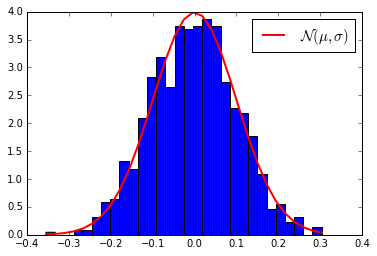

In [96]:
count, bins, ignored = plt.hist(s, 30, normed=True)
plt.plot(bins, np.exp( -(bins-mu)**2 / (2*sigma**2) ) / (sigma * np.sqrt(2*np.pi)), 
         color='r', lw=2.0, label=r'$\cal{N(\mu, \sigma)}$');
plt.legend(fontsize=15);

## Masked Arrays

MaskedArrays are a subclass of ndarrays containing a Boolean mask to indicate invalid data.

In [ ]:
x = np.array([1, 2, 3, -1, 5])

In [ ]:
mx = np.ma.masked_array(x, mask=[0, 0, 0, 1, 0])

In [ ]:
mx.data, mx.mask

In [ ]:
mx.mean()

In [ ]:
x = np.ma.array([1, 2, 3])

In [ ]:
x[0] = np.ma.masked
x

In [ ]:
x = np.ma.array([-1, 1, 0, 2, 3], mask=[0, 0, 0, 0, 1])

In [ ]:
np.log(x)

# Breakout session

1) Make an ndarray representing a 52 deck of cards (A, 2-10, J, Q, K + 4 suits) where each element represents a unique card including it’s numerical equivalent (e.g., A = 1, K = 13)

    >>> print(deck[11])
    ('Q', 'C', 12)

2) Drawing 5 cards randomly from a shuffled deck, what is probability of getting at least two cards of the same value (ie. a pair)? What is the probability of getting all five cards from the same suit (ie. a flush)?

*Hint:* `np.unique`, `np.random.shuffle`.

In [139]:
suits = ['C', 'H', 'S', 'D']
numbers = list(range(2,11))
number_cards = list(zip([str(i) for i in numbers], numbers))
special_cards = [('A',1),('J',11),('Q',12),('K',13)]

In [141]:
number_cards[0][0]

'2'

In [143]:
deck = []
for num_card in number_cards:
    for suit in suits:
        card = [suit, num_card[0], num_card[1]]
        deck.append(card)
for spec_card in special_cards:
    for suit in suits:
        card = [suit, spec_card[0], spec_card[1]]
        deck.append(card)

In [144]:
len(deck)

52

In [148]:
np_deck = np.array(deck)

In [155]:
np.random.shuffle(np_deck)

In [154]:
shuffled_deck

In [152]:
shuffled_deck

In [101]:
special_cards

['ace', 'jack', 'queen', 'king']

In [104]:
from itertools import combinations

In [107]:
combinations?

In [106]:
list(combinations(number_cards, suits))

TypeError: 'list' object cannot be interpreted as an integer

## Stacking and concatenation

numpy also provides handy routines to concatenate (and split) arrays.

In [ ]:
a = np.array([[1, 2], [3, 4]])
a

In [ ]:
b = np.array([[5, 6]])
b

In [ ]:
print a.shape, b.shape

In [ ]:
x = np.concatenate((a, b), axis=0)

In [ ]:
print x, x.shape

In [ ]:
y = np.concatenate((a, b.T), axis=1)

In [ ]:
print y, y.shape

In [ ]:
np.vstack((a,b))

In [ ]:
np.hstack((a,b.T))

**Optional Exercise: reading a text file with mixed data**

Consider loading data from a text file with the format:

<pre>
# Station  Lat    Long   Elev 
BIRA	26.4840	87.2670	0.0120
BUNG	27.8771	85.8909	1.1910
etc...
</pre>

These are seismic measurement stations in the Himalaya, with the elevation indicated in km.  Data with a structure such as this is common in many disciplines, and because we have a combination of text and numerical fields, we can't directly load it into a numpy array with a simple dtype. We'll need to define a dtype that matches this kind of data.

Questions:

1. Define a dtype descriptor for the above fields.
1. Load the file `stations.txt` into an array called `stations` using `np.loadtxt` and the dtype you just created.
1. *Think:* what are the dimensions of the array you just created? Is it a 1-d array or a 2-d one?
1. Print the mean latitude, mean longitude and maximum elevation.
1. *Bonus:* find the name of the station with maximum elevation (hint: `np.argmax`)


In [ ]:
#%load soln_stations.py

**Note:** for tabular data, the Pandas library (covered later today) provides much more powerful and convenient facilities.  The following code would read the above file using Pandas:

    read_table('stations.txt', names=('station', 'lat', 'lon', 'elev'), skiprows=1)

But numpy's structured arrays can be used in many contexts where Pandas is not the appropriate tool, such as multidimensional arrays with complex dtypes. Imagine for example describing the temperature `T` and pressure `p` in a 3-d volume represented by a $2\times 3 \times 4$ array that you initialize to constant values for a simulation:

In [ ]:
x = np.zeros((2,3,4), dtype=[('T', float), ('p', float)])
x['T'] = 10
x['p'] = 20
x

We'll also learn about `xarray` later on in the course...